In [1]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [4]:
def plot_data(X, y, ax, pos_label='y=1', neg_label='y=0', s=80, loc='best'):
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)
    neg = neg.reshape(-1,)
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', color='r', s=s, label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, fc='none', ec='blue', lw=2)
    ax.legend(loc=loc)
    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

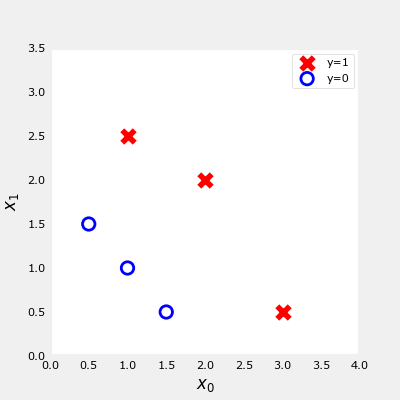

In [5]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()


In [6]:
def sigmoid(z):
    z = np.asarray(z, dtype=np.float64)
    out = np.empty_like(z, dtype=np.float64)
    pos = z >= 0
    neg = ~pos
    out[pos] = 1.0 / (1.0 + np.exp(-z[pos]))
    out[neg] = np.exp(z[neg])/(1.0 + np.exp(z[neg]))
    return out

In [10]:
def compute_gradient_logistic(X, y, w, b): 
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    e = f_wb - y
    dj_dw = 1/m * np.dot(X.T, e)
    dj_db = 1/m * np.sum(e)
    return dj_db, dj_dw

In [11]:
def log_1pexp(z):
    z = np.asarray(z, dtype=np.float64)
    out = np.where(
        z >= 0,
        z + np.log1p(np.exp(-z)),
        np.log1p(np.exp(z))
    )
    return out

In [13]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    cost = -y * z + log_1pexp(z)
    return np.squeeze(1/m * np.sum(cost))

In [12]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.49833339 0.49883943]
dj_dw: [0.4983333932786961, 0.4988394298399669]


In [14]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    save_interval = math.ceil(num_iters/100000)

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i == 0 or i % save_interval == 0:
            J_history.append(compute_cost_logistic(X, y, w,b))

        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return w, b, J_history


In [15]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6846104685605737   
Iteration 1000: Cost 0.15909776668704567   
Iteration 2000: Cost 0.08460064176930082   
Iteration 3000: Cost 0.05705327279402536   
Iteration 4000: Cost 0.04290759421682006   
Iteration 5000: Cost 0.03433847729884562   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.024501569608793072   
Iteration 8000: Cost 0.021423703325692885   
Iteration 9000: Cost 0.01903013712410919   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019839


In [75]:
def plt_prob(ax, w_out,b_out):
    """ plots a decision boundary but include shading to indicate the probability """
     # Setup useful ranges and grid
    x0_space  = np.linspace(0, 4 , 100)
    x1_space  = np.linspace(0, 4 , 100)
    tmp_x0,tmp_x1 = np.meshgrid(x0_space,x1_space)
    
    # Stack grid points and compute probabilities (vectorized)
    X_grid = np.c_[tmp_x0.ravel(), tmp_x1.ravel()]
    z = sigmoid(X_grid @ w_out + b_out)
    z = z.reshape(tmp_x0.shape)

    pcm = ax.pcolormesh(tmp_x0, tmp_x1, z,
                   cmap="Blues",
                   shading='nearest', 
                   alpha = 0.7)
    ax.figure.colorbar(pcm, ax=ax)
    #ax.contour(tmp_x0, tmp_x1, z, levels=[0.5], colors='red', linewidths=2)

2.69301075625407 2.8007035962501785


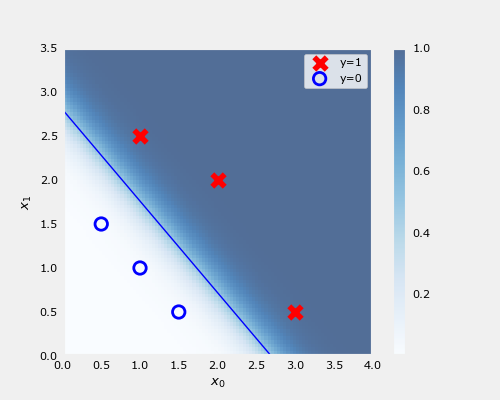

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c='blue', lw=1)
plt.show()

In [71]:
plt.close('all')